<a href="https://www.kaggle.com/code/ayushs9020/inventing-image-segmentation-from-scratch?scriptVersionId=131431072" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Image Segementation


$Image$ $segmentation$ is a process of `partitioning a digital image` into `multiple image segments`, also known as $image$ $regions$ or $image$ $objects$ (sets of pixels). The `goal` of segmentation is to `simplify` and/or `change the representation` of an image into something that is `more meaningful` and `easier to analyze`.

$Image$ $segmentation$ is typically used to `locate objects` and `boundaries` (lines, curves, etc.) in images. More precisely, $image$ $segmentation$ is the process of `assigning a label to every pixel` in an image such that `pixels with the same label share certain characteristics`.

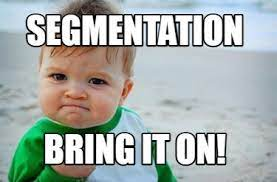

Today we will try to understand some of the well-known `Image Segemtation CNN Architechtures` and try to `make up them from scratch`

# 1 | Basic Terminologies 🏫

But before that, lets understand some of the `basic terminilogies` in the world of `Image Pprocessing`

* $Convolution$ $Layer$
* $Pooling$ $Layer$
* $DropOut$ $Layer$
* $Flatten$ $Layer$
* $Concatenation$ $Layer$
* $Sigmoid$ $Activation$ $Function$
* $Rectified$ $Linear$ $Unit$ $Activation$ $Function$ $(ReLU)$

## 1.1 | Convotlution

<img src = "https://i.ytimg.com/vi/KuXjwB4LzSA/hq720.jpg?sqp=-oaymwEcCNAFEJQDSFXyq4qpAw4IARUAAIhCGAFwAcABBg==&rs=AOn4CLDglX1Jo3WO2XUsh9x0ACDpEuNpCQ" width = 400>

$$Y_i = B_i + \sum\limits_{i = 1}^{n}(x_{ij} * k_{ij})$$

[Image Credits](https://www.youtube.com/watch?v=KuXjwB4LzSA)


In [1]:
import scipy
import numpy as np

In [2]:
from matplotlib import pyplot as plt
from IPython.display import IFrame

Okay se we all know if we do $$(x+y)(x+y) = (x+y)^2 = x^2 + 2xy + y^2$$

and $$(x + y + z)(x + y + z) = (x + y + z)^2 = x^2 + y^2 + z^2 + 2(xy + yz+ zx)$$

This was preety simple, but what if we have higher degrees like $$(x+ y + z....100terms)^2$$ or $$(a+b...89_-terms)(y+g...45_-terms)(t+y...69_-terms)$$ 

Lets assume we want the coeffiecents of the eqution $(x+y)^2 =? $

In [3]:
np.convolve([1 , 1] , [1 , 1])

array([1, 2, 1])

The coeffiecients will be $(1 , 2 , 1)$ or $(1x^2 + 2xy + 1y^2)$

What if we want of more 

In [4]:
np.convolve([1 , 1 , 1] , 
            [1 , 1 , 1])

array([1, 2, 3, 2, 1])

The coeffiecients will be $(1 , 2, 3 , 2 , 1)$ or $(1x^4 + 2x^3 + 3x^2 + 2x + 1)$

And furthermore

```
np.convolve([1 , 2 , 3] , 
            [4 , 5 , 6] , 
            [7 , 8 , 9])
```
This will throw an error 

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-4-131ad91819d7> in <cell line: 1>()
----> 1 np.convolve([1 , 2 , 3] , 
      2             [4 , 5 , 6] ,
      3             [7 , 8 , 9])

1 frames
/usr/local/lib/python3.10/dist-packages/numpy/core/overrides.py in convolve(*args, **kwargs)

/usr/local/lib/python3.10/dist-packages/numpy/core/numeric.py in convolve(a, v, mode)
    842     if len(v) == 0:
    843         raise ValueError('v cannot be empty')
--> 844     return multiarray.correlate(a, v[::-1], mode)
    845 
    846 

TypeError: convolve/correlate mode not understood
```

So we cannot do this directly, what we can rather do is

In [5]:
np.convolve(np.convolve([1 , 2 , 3] , 
                        [4 , 5 , 6]) , 
            [7 , 8 , 9])

array([ 28, 123, 336, 530, 594, 387, 162])

Or

In [6]:
np.convolve(np.convolve([4 , 5 , 6] , 
                       [7 , 8 , 9]) , 
           [1 , 2 ,3])

array([ 28, 123, 336, 530, 594, 387, 162])

And we got the same arrays 

But this gets tricky when we have high level of arrays 

In [7]:
array_1 = np.arange(1000000)
array_2 = np.arange(1000000)

In [8]:
# np.convolve(array_1 , array_2) # Thats gonna take a lot of time, I dont want to loose my cores, I have already lost 15 :( , and thus i am commenting this out

So how can we do large functions, for that we use

In [9]:
scipy.signal.fftconvolve(array_1 , array_2)

array([5.87202560e+01, 2.51658240e+01, 1.09051904e+02, ...,
       2.99998800e+12, 1.99999400e+12, 9.99998000e+11])

One more intution you can get of convolve is from the rolling of the dice

<img src = "https://www.math-only-math.com/images/xprobability-for-rolling-two-dice.jpg.pagespeed.ic.MTXD4wiqQ_.jpg">

|Terms|No of occrences, if both the dice are added|
|---|---|
|1|0|
|2|1|
|3|2|
|4|3|
|5|4|
|6|5|
|7|6|
|8|5|
|9|4|
|10|3|
|11|2|
|12|1|

And the convolve of $(1 , 1 , 1 , 1 , 1 , 1)*((1 , 1 , 1 , 1 , 1 , 1))$ is 

In [10]:
np.convolve([1 , 1 , 1 , 1 , 1 , 1] , 
            [1 , 1 , 1 , 1 , 1 , 1])

array([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1])

Notice something??

Convolve is basically aslo teeling the number of occurence of the number in a particular order.

So now we have a basic understanding of the convolve. 

Viewung it with the respect of images.

Lets assume we have an `image` of $1$ channel only, means the image is `black and white`.

We can take the image is a $2D$ matrix of numbers in the range $(0,1)$.

If we take a small matrix of dimensions, say $(3,3)$, and try to place it over a subset of the orginal big matrix of image. Then we multiply the corresponding numbers.

We say we `convolved a subset` of the image with the small matrix.

If we try to do this `making a stride over the image` matrix and try to cover the whole image.

We say we `convolved the whole image` with the small matrix.

In technincal terms we say the small matrix, `the kernel or filter`.

If we take the image of say $3$ channels. We do the same process for each channel perticularly.

**`So what is the use of doing this...?`**

The use majorly `depends on the type of kernel` we use. We can use different kernels to perform different image processing tasks like

* Bluring
* Sharpening
* Detecting Edges

We should always choose a `kernel size of odd number`, as at that point we can find the `middle element of the kernel`

Sometimes when we convolve an image. We  find a `sort of border on the resultant image`. That is because convolution at the corners and the edges basically means that we are `only taking` $1$ or $2$ `pixels into account`. To counter that, we sometimes create a `padding at the edges of the image`. 

**Padding is basically placing $0s$ over the border**

When we convolve an image of pixels $(x,x)$ with a kernel of size $(a,a)$ . The `resultant image` gets a `bit shorter`, making its `size smaller`. We can `caluclate the relsutant size` by the formula
$$\frac{I_s + K+2P}{S}+1$$
 
where

* $I_s=Input$ $Size$
 
* $K=Kernel$
 
* $P=Padding$
 
* $S=Stride$
 
So now we have a basic idea of the Convolution.

## 1.2 | Pooling 

Here we take a `image matrix` and `only focus on a defined part` of the matrix. Like the image is of the size $(500,500)$ . But we only focus on the first $(3,3)$
. Pooling is usually doing `different operations on this small subset of the image`.

Technically we say the whole matrix as a `Pool`, and we do operations on a defined subset.

If we do this only one time, we call this `Pooling a subset of the image`

If we make a stride and try to move it over the whole image, we cal that `Pooling the whole image`

By operations we mean different mathemmatical actions with the subset. The major ones we use are

* Max Pooling
* Min Pooling
* Mean/Average Pooling

**`So what is the use of doing this...?`**

Pooling is basically used to `reduce the dimensions of the image` and still `retaining the conceptual` or the core information of the image

For caluclating the size of the resultant image, the same formula can be used as in the `Convolution Layer`

```
tensorflow.keras.layers.MaxPooling1D()
tensorflow.keras.layers.MaxPooling2D()
tensorflow.keras.layers.MaxPooling3D()

tensorflow.keras.layers.AveragePooling1D()
tensorflow.keras.layers.AveragePooling2D()
tensorflow.keras.layers.AveragePooling3D()
```

<img src = "https://blog.intheswim.com/wp-content/uploads/2020/01/no-pool.jpeg">

## 1.3 | DropOut Layer

The `Dropout layer` is a `regularization technique` commonly used in neural networks, including convolutional neural networks $CNNs$. Its purpose is to `prevent overfitting`, which occurs when the model performs `well on the training data but fails to generalize to new, unseen data`.

The Dropout layer works by randomly `dropping out` or `setting to zero` a `certain proportion` of the `input units` or neurons during training. This means that during each training `iteration`, a different `subset of neurons is deactivated`. By doing so, the network is `forced to learn redundant representations`, as it cannot `rely on specific neurons` or `combinations of neurons to make predictions`. This encourages the network to become `more robust` and prevents it from `relying too heavily on specific features`.

```
tensorflow.keras.layers.DropOut()
```

<img src = "https://i.pinimg.com/originals/a9/be/da/a9bedafffa1ed08f8e9834f2f5f24d3f.jpg" width = 500>

## 1.4 | Flatten Layer 

Lets assume we have an array like this

In [11]:
sample_array = np.array([[x for x in range(100)] , 
                        [x for x in range(100)]])
sample_array , sample_array.shape

(array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
         16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
         32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
         48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
         64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
         80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
         96, 97, 98, 99],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
         16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
         32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
         48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
         64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
         80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
         96, 97, 98, 99]]),
 (2, 100))

If we use the function `flatten()`

In [12]:
sample_array = sample_array.flatten()
sample_array , sample_array.shape

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99,  0,  1,
         2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
        53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
        70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
        87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 (200,))

So flatten means basically making a $1−D$ array

<img src = "https://img.ifunny.co/images/44230890cd7e6a02ffb3139103728da727b13921636f6ba1b106adc7ae143d81_1.jpg" width = 400>

## 1.5 | Concatination Layer 

$Concatenation$ $Layer$ is a layer that `concatenates a list of inputs`. It takes as `input a list of tensors`, all of the `same shape` except for the concatenation axis, and `returns a single tensor that is the concatenation of all inputs`.

The $Concatenate$ $Layer$ is often used to `combine the outputs of different layers in a neural network`. For example, we might use a `concatenate layer to combine the outputs of two convolutional layers` in order to create a deeper convolutional layer.

The concatenate layer can also be used to `combine the outputs of different models`. For example, we might use a `concatenate layer to combine the outputs of a model that predicts the presence of an object` in an image with the `outputs of a model that predicts the location of the object in the image`.

```
tensorflow.keras.layers.Concatenate()
```

<img src = "https://i.redd.it/vvjag4pjieu51.jpg" width = 500>

## 1.6 | Sigmoid Function

We can see this is 
$$f(x)=\Bigg[\frac{1}{0}\frac{...}{...}\frac{if}{if}\frac{x>=1}{x<=0}$$
 
some people also write this as Formula $$f(x)=\frac{1}{1+e^{-x}}$$

And actually they ar pretty both the same

Lets call this bitch `Sigmoid`

In [13]:
IFrame("https://www.desmos.com/calculator/naoyf4vywi" , 400 , 400)

So how this function knows that $1$ is the limit...?

One way to find out is to change some values
$$f(x)=\frac{5}{1+e^{−x}}$$

In [14]:
IFrame("https://www.desmos.com/calculator/8kpchslmim"  , 400 , 400)

What if we take $x$ as postive
$$f(x)=\frac{1}{1+e^x}$$

In [15]:
IFrame("https://www.desmos.com/calculator/tilthcejmx" , 400 , 400)

What if we change the value of $x$
 
$$f(x)=\frac{5}{1+e^{(−x+10)}}$$

In [16]:
IFrame("https://www.desmos.com/calculator/ictkwtquez"  , 400 , 400)

A visulaization how math can be perfect sometimes $:)$
$$f(x)=\frac{5}{5+e^{−x}}$$

In [17]:
IFrame("https://www.desmos.com/calculator/xz7jwzs2v9"  , 400 , 400)

One thing we can note is that the function not merely depends on the numeriator to find the value of the upper limit, but rather the dividend of both the numerator and the independent term in the dimoninator

## 1.7 | ReLU 

There are some cases where we do not need the negative values and only need the positive ones. If you havent find any case like that, soldier world is very small, the case will find its way to you soon

One way to counter this problem is to use a function like Formula
$$f(x)=\Bigg [\frac{x}{0}\frac{if}{if}\frac{x>0}{x<0}$$

In [18]:
IFrame("https://www.desmos.com/calculator/wptxy1wqa1" , 400, 400)

You can see this as the amount of sadness you got on y-axix and your years of life on the x-axis. You have not born yet before the $0$
 
Lets assume you were not able to feel emotions till $5$ years, we can see that as
$$f(x)=\Bigg[\frac{x+5}{0}\frac{if}{if}\frac{x>0}{x<0}$$

In [19]:
IFrame("https://www.desmos.com/calculator/tto4l1ylqo" , 400 , 400)

Lets assume your are a straight person and thats why you get less privelages and thus your sadness did not started from $0$ but rather than $2$
 
$$f(x)=\Bigg[\frac{x + 2}{2}\frac{if}{if}\frac{x>0}{x<0}$$

In [20]:
IFrame("https://www.desmos.com/calculator/yoowzap3y1"  , 400 , 400)

# 2 | HuBMAP Data 🚀 

The $HuBMAP$ $-$ $Hacking$ $the$ $Human$ $Vasculature$ $competition$ is a $Kaggle$ $competition$ that challenges participants to `develop machine learning models to segment microvascular structures` in $2D$ `PAS-stained histology images` from healthy human kidney tissue slides. The goal of the competition is to `improve researchers' understanding of how the blood vessels are arranged in human tissues`.

The competition is hosted by the $Human$ $BioMolecular$ $Atlas$ $Program$ $HuBMAP$, which is a `global effort to create a comprehensive and open-access atlas of human cells`. $HuBMAP$ researchers are using the `latest molecular and cellular biology technologies` to `study the connections that cells have with each other` throughout the body.

The `microvascular structures` that are being segmented in this competition `include` 
* $Capillaries$
* $Arterioles$
* $Venules$

These structures are `very small` and `difficult to see with the naked eye`, so `automated segmentation methods are essential` for researchers to study them.

**[National effort to focus on mapping human body on cellular level](https://www.purdue.edu/newsroom/releases/2019/Q4/national-effort-to-focus-on-mapping-human-body-on-cellular-level.html)**

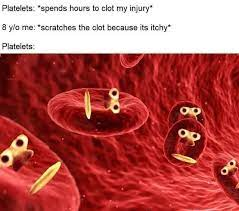

The images are $256x256$ pixels in `size` and are in the `.tif` format. The images are a `diverse set` of images from `different patients` and `different tissue slides`.

The `ground truth segmentation` for the `images` in the data set was created by a `team of experts`. The experts used a `variety of techniques` to create the ground truth segmentation
* Manual segmentation
* Semi-automatic segmentation. 

The ground truth segmentation is accurate and reliable, and it is essential for training machine learning models to segment microvascular structures.

In [21]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hubmap-hacking-the-human-vasculature/sample_submission.csv
/kaggle/input/hubmap-hacking-the-human-vasculature/tile_meta.csv
/kaggle/input/hubmap-hacking-the-human-vasculature/wsi_meta.csv
/kaggle/input/hubmap-hacking-the-human-vasculature/polygons.jsonl
/kaggle/input/hubmap-hacking-the-human-vasculature/test/72e40acccadf.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/2dac08665dd3.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/401cc7fbcf22.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/db4621c7226b.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/e30f64761d6b.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/9d6734304154.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/756efdf5b917.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/ee49ab2b0bf2.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/823b99840b99.tif
/kaggle/input/hubmap-hacking-the-human-vasculature/train/78f336539d

Thanks to **[YASSINE ALOUINI](https://www.kaggle.com/yassinealouini)=>[Working with TIFF files](https://www.kaggle.com/code/yassinealouini/working-with-tiff-files)** for providing a simple way to work wit the `tif` files withing python environments

I have change the way of input for the image from `rasterio` to `opencv`, though it was concluded in **[YASSINE ALOUINI](https://www.kaggle.com/yassinealouini)=>[Some Insights](https://www.kaggle.com/competitions/hubmap-organ-segmentation/discussion/333389)**that `rasterio` is the fastest way 

In [22]:
train_dir = "/kaggle/input/hubmap-hacking-the-human-vasculature/train"
test_dir = "/kaggle/input/hubmap-hacking-the-human-vasculature/test"

In [23]:
with open("/kaggle/input/hubmap-hacking-the-human-vasculature/sample_submission.csv" , "r") as f:
    k = list(f)
print(k[0])

id,height,width,prediction_string



# 3 | Visualizing the Data 😎

Visualizing the data is an integral part of image models. It gives us information on what we aare actually working, and also we do this for fun. Yayyyyyyyy

Lets asusme we take this iamge as sample 

Lets assume we want to train a model on the dataset we have. But it is not a good idea to directly train a big model on this data. 

When we are working with the images, it is advised to first preproces the images, before sending them to any model 

By preporcessing we mostly mean that 

|_____|______
|---|---
|Resize|To ensure that all images are the same size.
||To reduce the amount of data that needs to be processed.
||To improve the accuracy of the model.
|Mean|It helps to improve the stability of the model. 
||It helps to improve the performance of the model.
||It helps to make the model more robust to changes in lighting.
|STD|It helps to improve the stability of the training process.
||It helps to improve the performance of the model. 
||It makes the model more interpretable.

We could have actually made a proper function from scratch to do these things, like this 
```
def preprocess(image):
    
    image = np.clip(image , width , height)

    image = (image - image.mean()) / image.std()

    return image
```
(this might be not correct, but just a example)

But we rather use a specialized library that is faster. The `code we just wrote` can be `very slow to work`. But `albumnetnation library` can be `fast enough`

In [24]:
import cv2

In [25]:
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [26]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [27]:
A.Compose([
        A.Resize(width = 512 , height = 512) , 
        A.Normalize(
            mean = [0 , 0] , 
            std = [1 , 1] , 
            max_pixel_value = 255
        ) , 
        ToTensorV2()
    ])

Compose([
  Resize(always_apply=False, p=1, height=512, width=512, interpolation=1),
  Normalize(always_apply=False, p=1.0, mean=[0, 0], std=[1, 1], max_pixel_value=255),
  ToTensorV2(always_apply=True, p=1.0, transpose_mask=False),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})

This is our `compose` block

Now lets make a proper function `display` for viewing the image

In [28]:
sample_image = cv2.imread("/kaggle/input/hubmap-hacking-the-human-vasculature/test/72e40acccadf.tif")

In [29]:
def display(im , augments = False):

    img = im
    
    if augments :
        
        img = A.Compose([
        A.Resize(width = 512 , height = 512) , 
        A.Normalize(
            mean = [0 , 0 , 0] , 
            std = [1 , 1 , 1] , 
            max_pixel_value = 255
        ) , 
        ToTensorV2()
    ])(image = im)["image"]

    # return image
    
    plt.imshow(tf.reshape(img , (512 , 512 , 3)))

Test Image before preprocessing : 


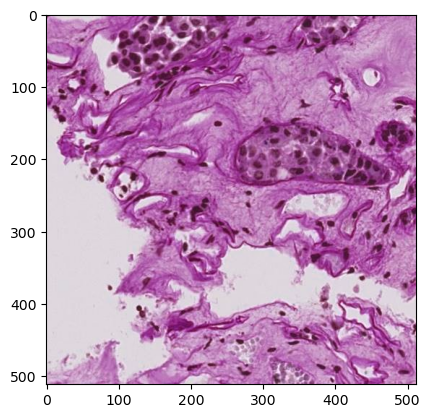

In [30]:
print("Test Image before preprocessing : ")
display(sample_image)

Test Image before preprocessing : 


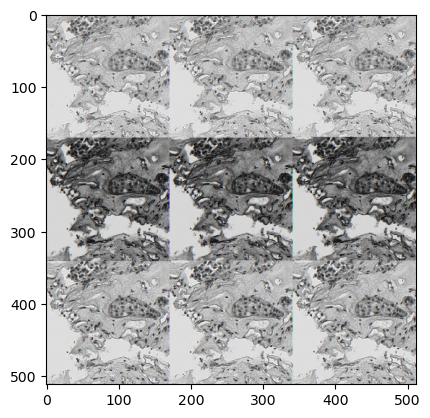

In [31]:
print("Test Image before preprocessing : ")
display(sample_image , augments = True)

# 4 | Pytorch DataLoader 📖

A data loader is a tool that helps to load data into a deep learning model. It is used to break down the data into smaller batches, which can then be processed by the model more efficiently. Data loaders can also be used to shuffle the data, which can help to improve the performance of the model.

The `DataLoader` we are going to create here, is highly inspired by **[Thomas Rochefort-Beaudoin](https://www.kaggle.com/thomasrochefort)=>[HuBMAP : Simple PyTorch DataLoade](https://www.kaggle.com/code/thomasrochefort/hubmap-simple-pytorch-dataloader/notebook)**

* We simply first read the `json files`
* Then we get the images from the set
* Then according to the coordinates in the `json_file`. We mask the blood vessels. 
* The we return the image and the mask

Blood vessels are often masked in medical imaging competitions to make the task of identifying other objects in the image more challenging. This is because blood vessels can be very similar in appearance to other objects, such as tumors or lesions. Masking the blood vessels forces the model to focus on the other objects in the image, and to learn to distinguish them from the blood vessels. This can lead to more accurate and reliable detection of other objects in the image.

In [32]:
import json

In [33]:
from torch.utils.data import DataLoader, Dataset

In [34]:
a = A.Compose([
        A.Resize(width = 512 , height = 512) , 
        A.Normalize(
            mean = [0 , 0 , 0] , 
            std = [1 , 1 , 1] , 
            max_pixel_value = 255
        ) , 
        ToTensorV2()
    ])

In [35]:
class hubmapDataset(Dataset):
    
    def __init__(self, image_dir, labels_file , augments = False):
        
        with open(labels_file, 'r') as json_file:
            self.json_labels = [json.loads(line) for line in json_file]

        self.image_dir = image_dir
#         self.transform = transform
        self.augments = augments

    __len__ = lambda self : len(self.json_labels)    
        
    def __getitem__(self, idx):
        
        image_path = os.path.join(self.image_dir, f"{self.json_labels[idx]['id']}.tif")
        image = Image.open(image_path)
        
        if self.augments:
            
            image = a(image = image)["image"]
        
        mask = np.zeros((512, 512), dtype=np.float32)

        for annot in self.json_labels[idx]['annotations']:

            cords = annot['coordinates']
            
            if annot['type'] == "blood_vessel":
                
                for cord in cords:
                    
                    rr, cc = np.array([i[1] for i in cord]), np.asarray([i[0] for i in cord])
                    
                    mask[rr, cc] = 1

        image = torch.tensor(np.array(image), dtype=torch.float32).permute(2, 0, 1)  # Shape: [C, H, W]
        mask = torch.tensor(mask, dtype=torch.float32)

#         if self.transform:
#             image = self.transform(image)

        return image, mask

In [36]:
train_dataset = hubmapDataset(image_dir = train_dir, labels_file = '../input/hubmap-hacking-the-human-vasculature/polygons.jsonl')

# 5 | Seperating the Files 📂

Lets make a seperete direcotry for these `images` and their corresponding `masks`

In [37]:
import torchvision.transforms as T
import torch

In [38]:
from tqdm import tqdm
from PIL import Image

In [39]:
path = "/kaggle/working/"

os.makedirs('/kaggle/working/Sample_data/Image')
os.makedirs('/kaggle/working/Sample_data/Mask')

We got `torch.tensor()` data type from our `dataloader`, and thus we will convert that into `PILImage`  format and then save the corresponding into the `file`

In [40]:
transform = T.ToPILImage()

In [41]:
for index , data in tqdm(enumerate(train_dataset) , total = len(train_dataset)):
    img , mask = data
    
    img = transform(img)
    mask = transform(mask)
    
    img.save(path + "Sample_data/Image/img_" + str(index) + ".jpg")
    mask.save(path + "Sample_data/Mask/mas_" + str(index) + ".jpg")

100%|██████████| 1633/1633 [00:48<00:00, 33.35it/s]


And we have succesfully loaded our seperate files into the `working directory `

# 6 | Tensorflow DataLoader 📅
So now this is our `train` and `test` directories

In [42]:
image_dir = "/kaggle/working/Sample_data/Image/"
mask_dir = "/kaggle/working/Sample_data/Mask/"

These our data files 

In [43]:
train = os.listdir(image_dir)
test = os.listdir(mask_dir)

This is our actual paths to `train` and `test`

In [44]:
X_train = []
Y_train = []

Now we will load data for `tensorflow`

In [45]:
image_height = 128
image_width = 128

In [46]:
for path in tqdm(train , total = len(train)):
    train_path = str(image_dir) + str(path)
    
    img = cv2.imread(train_path)
    img = cv2.resize(img , (image_height , image_width))
    img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

    X_train.append(img)

100%|██████████| 1633/1633 [00:07<00:00, 232.72it/s]


In [47]:
for path in tqdm(test , total = len(test)):
    test_path = str(mask_dir) + str(path)

    img = cv2.imread(test_path)
    img = cv2.resize(img , (image_height , image_width))
    img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    
    Y_train.append(img)

100%|██████████| 1633/1633 [00:02<00:00, 594.49it/s]


This is our `train` and `test` data 

In [48]:
len(X_train) , len(Y_train)

(1633, 1633)

In [49]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

# 7 | TO DO LIST 📃

```
TO DO 1 : TRAIN A SIMPLE KERAS MODEL

TO DO 2 : ADD WANDB SUPPORT

TO DO 3 : TRAIN A SIMPLE PYTORCH MODEL

TO DO 4 : VISUALIZE THE DATA 

TO DO 5 : TRAIN A HUGGING FACE MODEL(MAYBE YOLO) 

TO DO 6 : DIG IN THE DATA MORE

TO DO 7 : DANCE ON "I LIKE TO MOVE IT MOVE IT"
```

<img src = "https://i.ytimg.com/vi/_p1kjacAWUk/maxresdefault.jpg" width = 500>

# 8 | Ending 🫡

**THAT IT FOR TODAY GUYS**

**WE WILL GO DEEPER INTO THE DATA IN THE UPCOMING VERSIONS**

**PLEASE COMMENT YOUR THOUGHTS, HIHGLY APPRICIATED**

**DONT FORGET TO MAKE AN UPVOTE, IF YOU LIKED MY WORK :)**

<img src = "https://i.imgflip.com/19aadg.jpg">

**PEACE OUT !!!! :)**